In [1]:
#!pip install pandas_datareader

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from pandas_datareader import data as wb
import matplotlib.pyplot as plt
from scipy.stats import norm
%matplotlib inline

In [2]:
#!pip install yfinance

In [59]:
import yfinance as yfin
ticker = 'AMZN'
data = pd.DataFrame()
data[ticker] = yfin.download(ticker, start='2018-01-01')['Adj Close'].to_frame()
data.head()

[*********************100%***********************]  1 of 1 completed


,AMZN
Date,
2018-01-02,59.450500
2018-01-03,60.209999
2018-01-04,60.479500
2018-01-05,61.457001
2018-01-08,62.343498


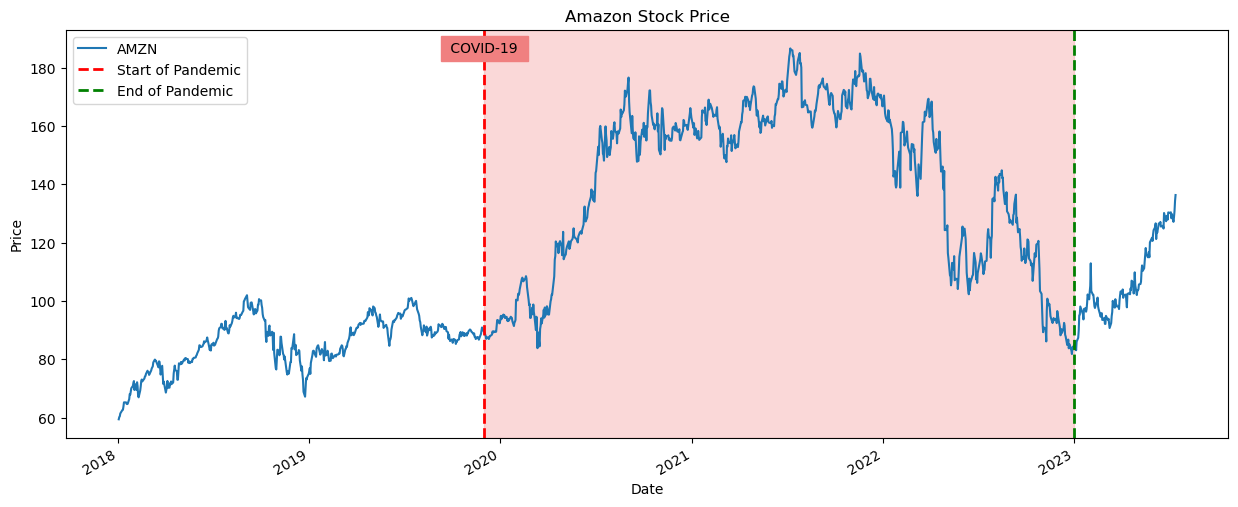

In [66]:
# Plot the stock price data
plt.figure(figsize=(15, 6))
data.plot(ax=plt.gca())

# Define the start and finish dates of the pandemic
start_date = '2019-12-01'
end_date = '2023-01-01'

# Add a light red background between the lines
plt.axvspan(start_date, end_date, alpha=0.3, color='lightcoral')

# Add lines representing the start and finish of the pandemic
plt.axvline(x=start_date, color='red', linestyle='--', linewidth=2, label='Start of Pandemic')
plt.axvline(x=end_date, color='green', linestyle='--', linewidth=2, label='End of Pandemic')

# Add text annotation for the pandemic period
plt.text(start_date, data.max().values[0], ' COVID-19 ', backgroundcolor='lightcoral', ha='center', va='center')

# Set plot title and labels
plt.title('Amazon Stock Price')
plt.xlabel('Date')
plt.ylabel('Price')

# Add legend
plt.legend()

# Display the plot
plt.show()

In [7]:
stock_returns = np.log(1 + data.pct_change())

stock_returns.tail()

,AMZN
Date,
2023-07-10,-0.020631
2023-07-11,0.012895
2023-07-12,0.015564
2023-07-13,0.026407
2023-07-14,0.010112


C:\Users\alero\.conda\envs\ML\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'Frequency')

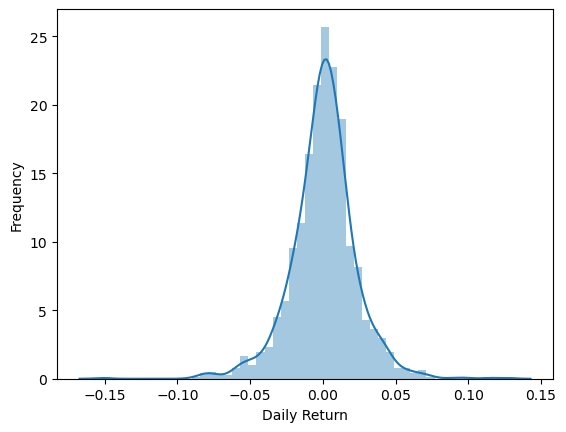

In [8]:
sns.distplot(stock_returns.iloc[1:])
plt.xlabel("Daily Return")
plt.ylabel("Frequency")

<AxesSubplot:xlabel='Date'>

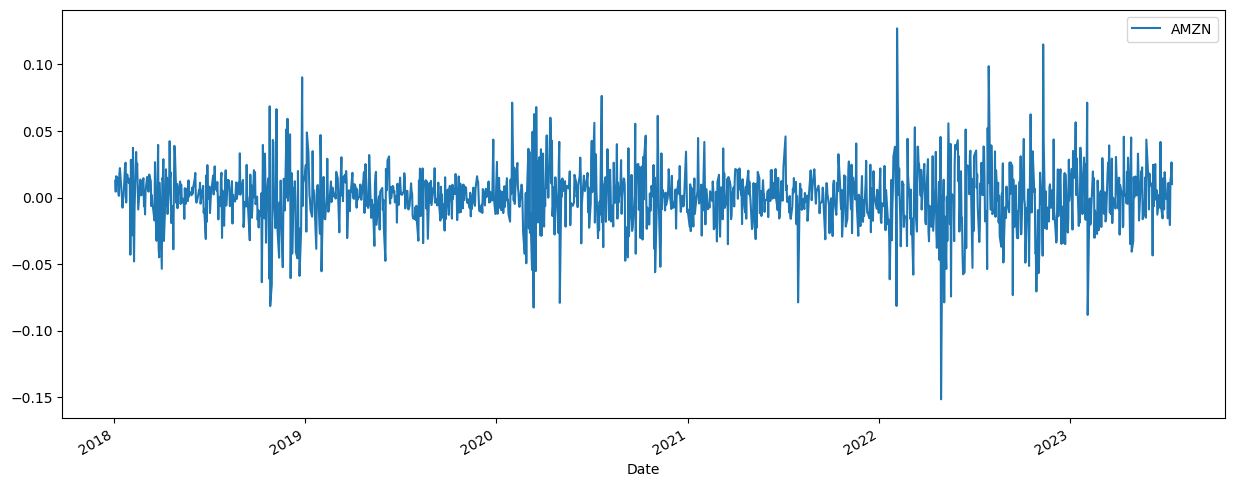

In [9]:
stock_returns.plot(figsize=(15,6))

In [10]:
u = stock_returns.mean()
var = stock_returns.var()

In [11]:
drift = u - (0.5*var)
drift


AMZN    0.00034
dtype: float64

In [12]:
stddev = stock_returns.std() 
stddev

AMZN    0.022511
dtype: float64

In [13]:
type(drift)

pandas.core.series.Series

In [14]:
type(stddev)

pandas.core.series.Series

In [15]:
np.array(drift)

array([0.00033975])

In [16]:
drift.values

array([0.00033975])

In [17]:
stddev.values

array([0.02251135])

In [18]:
x = np.random.rand(10,2)
x

array([[0.68599708, 0.49422724],
       [0.61906086, 0.87017225],
       [0.05785758, 0.60937745],
       [0.00952084, 0.60915938],
       [0.48627092, 0.22421748],
       [0.72809885, 0.30125207],
       [0.97561419, 0.19546576],
       [0.56742049, 0.650279  ],
       [0.62468226, 0.71498205],
       [0.41428857, 0.95040213]])

In [19]:
norm.ppf(x)

array([[ 0.48453556, -0.01447068],
       [ 0.30301519,  1.12720575],
       [-1.5730158 ,  0.27769683],
       [-2.34471406,  0.27712876],
       [-0.0344205 , -0.75802677],
       [ 0.60707324, -0.52080281],
       [ 1.97058281, -0.85792925],
       [ 0.16981068,  0.38607383],
       [ 0.31780154,  0.56799861],
       [-0.21652678,  1.64876526]])

In [90]:
stdev = stock_returns.std()
days = 30
iterations = 100
#Create random value with a given shape in the range from 0 to 1 - np.random.rand(10,2)
Z = norm.ppf(np.random.rand(days, iterations)) #days, trials

In [91]:
get_daily_returns = np.exp(drift.values + stdev.values * Z)

In [92]:
get_daily_returns

array([[1.00802969, 0.99543321, 0.99660376, ..., 0.99551494, 0.9990982 ,
        1.03588399],
       [1.01956466, 1.05373073, 0.99507081, ..., 1.03414845, 1.01547055,
        1.03372042],
       [1.00123506, 0.98980527, 1.04209179, ..., 0.99031685, 0.96744719,
        0.99008593],
       ...,
       [0.98932571, 0.9905401 , 1.00259464, ..., 1.01483558, 1.04543315,
        0.98722926],
       [1.00276126, 0.97370758, 1.02444778, ..., 0.99286159, 1.05851158,
        1.00753654],
       [0.95901919, 0.97047876, 1.0569578 , ..., 0.98674604, 0.99751337,
        1.01280419]])

In [93]:
S0 = data.iloc[-1]
S0

AMZN    136.25
Name: 2023-07-14 00:00:00, dtype: float64

In [94]:
price_paths = np.zeros_like(get_daily_returns)

In [95]:
price_paths.shape

(30, 100)

In [96]:
price_paths

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [97]:
price_paths[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [98]:
price_paths[0] = S0
price_paths

array([[136.25, 136.25, 136.25, ..., 136.25, 136.25, 136.25],
       [  0.  ,   0.  ,   0.  , ...,   0.  ,   0.  ,   0.  ],
       [  0.  ,   0.  ,   0.  , ...,   0.  ,   0.  ,   0.  ],
       ...,
       [  0.  ,   0.  ,   0.  , ...,   0.  ,   0.  ,   0.  ],
       [  0.  ,   0.  ,   0.  , ...,   0.  ,   0.  ,   0.  ],
       [  0.  ,   0.  ,   0.  , ...,   0.  ,   0.  ,   0.  ]])

In [99]:
for t in range(1, days):
    price_paths[t] = price_paths[t-1]*get_daily_returns[t]

In [100]:
price_paths

array([[136.25      , 136.25      , 136.25      , ..., 136.25      ,
        136.25      , 136.25      ],
       [138.91568507, 143.57081245, 135.57839735, ..., 140.90272607,
        138.35786248, 140.84440738],
       [139.08725482, 142.10714741, 141.28513486, ..., 139.53834413,
        133.85392475, 139.44806593],
       ...,
       [137.85975877, 159.57219365, 120.55206329, ..., 141.26768163,
        149.17944299, 119.8789266 ],
       [138.24042505, 155.37665401, 123.49929381, ..., 140.25925459,
        157.90816838, 120.78239905],
       [132.57522078, 150.78974202, 130.53354139, ..., 138.40026452,
        157.51550941, 122.32892003]])

Text(0, 0.5, 'Price')

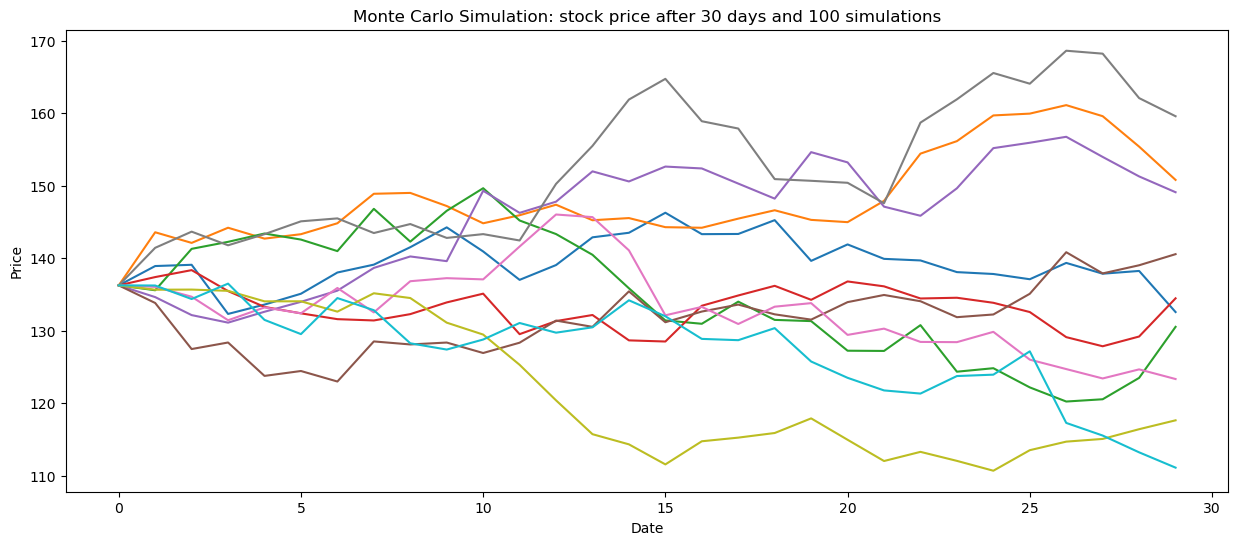

In [101]:
plt.figure(figsize=(15,6))
plt.plot(pd.DataFrame(price_paths).iloc[:,0:10])

# Set plot title and labels
plt.title('Monte Carlo Simulation: stock price after 30 days and 100 simulations')
plt.xlabel('Date')
plt.ylabel('Price')


In [70]:
MCS = pd.DataFrame(price_paths)

In [71]:
# Set the date range for the new index
start_date = '2023-07-14'
end_date = '2023-08-12'

# Generate the date range
date_range = pd.date_range(start=start_date, end=end_date)

In [72]:
# Change the row index to the date range
MCS = MCS.set_index(date_range)

# Display the DataFrame with the updated row index
print(MCS)

                    0           1           2           3           4   \
2023-07-14  135.664993  135.664993  135.664993  135.664993  135.664993   
2023-07-15  130.766361  133.244117  133.387399  134.311794  141.186533   
2023-07-16  131.667796  126.021492  133.623305  134.759297  136.256895   
2023-07-17  133.365916  124.768864  137.747276  133.436602  135.337276   
2023-07-18  132.209282  123.163936  138.135486  133.785769  133.236192   
2023-07-19  135.272957  119.903777  137.580629  133.037413  132.915616   
2023-07-20  135.132455  121.248668  133.662281  132.643169  129.476244   
2023-07-21  135.028030  120.071837  129.521478  125.641117  128.635296   
2023-07-22  141.224241  116.815293  125.548606  124.590685  129.356478   
2023-07-23  141.034523  116.720677  124.752476  124.589314  129.929583   
2023-07-24  143.423305  119.762071  132.107591  123.771501  128.059668   
2023-07-25  141.106480  116.620337  134.493323  124.637645  128.763629   
2023-07-26  143.300941  115.601474  13

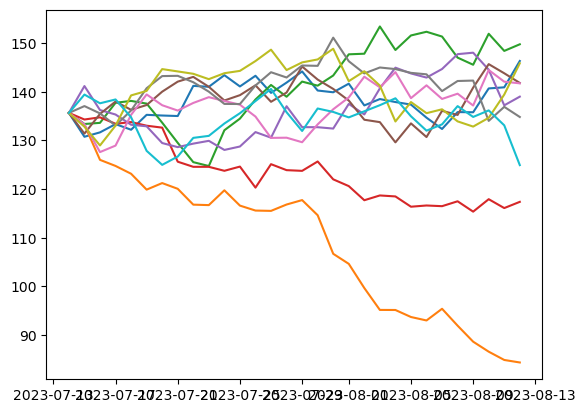

In [74]:
plt.plot(pd.DataFrame(MCS).iloc[:,0:10])

[*********************100%***********************]  1 of 1 completed


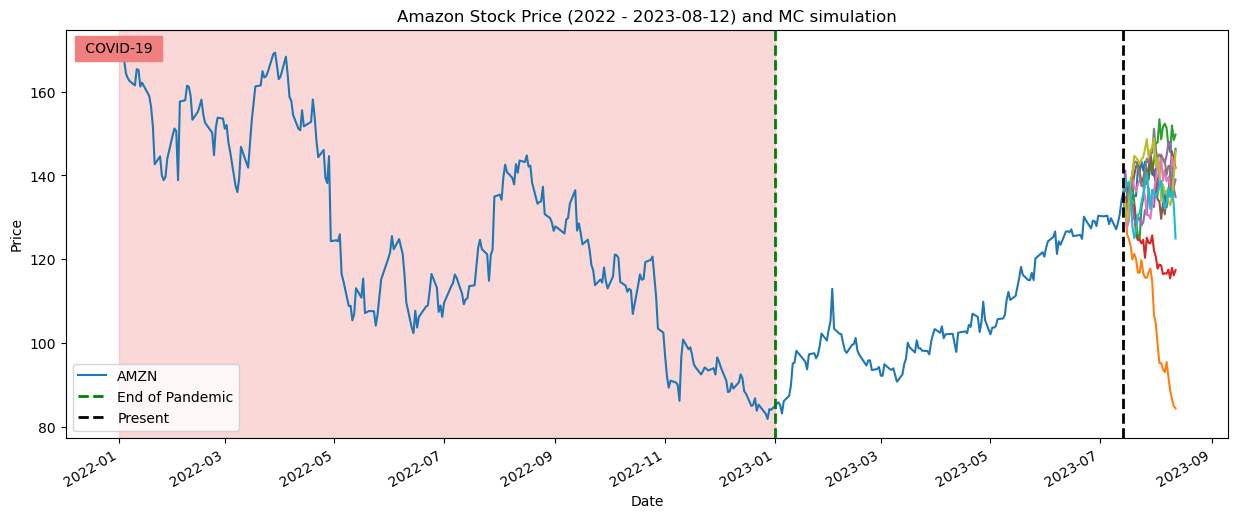

In [112]:
import yfinance as yfin
import pandas as pd
import matplotlib.pyplot as plt

# Retrieve stock price data
ticker = 'AMZN'
data = pd.DataFrame()
data[ticker] = yfin.download(ticker, start='2022-01-01')['Adj Close'].to_frame()

# Define the start and finish dates for the desired period
start_date = '2022-01-01'
end_date = '2023-08-12'

# Plot the stock price data for the desired period
plt.figure(figsize=(15, 6))
plt.plot(pd.DataFrame(MCS).iloc[:,0:10])
data[start_date:end_date].plot(ax=plt.gca())


# Add a light red background between the lines
plt.axvspan('2022-01-01', '2023-01-01', alpha=0.3, color='lightcoral')

# Add lines representing the start and finish of the pandemic
plt.axvline(x='2023-01-01', color='green', linestyle='--', linewidth=2, label='End of Pandemic')
plt.axvline(x='2023-07-14', color='black', linestyle='--', linewidth=2, label='Present')

# Add text annotation for the pandemic period
plt.text('2022-01-01', data[start_date:end_date].max().values[0], ' COVID-19 ', backgroundcolor='lightcoral', ha='center', va='center')

# Set plot title and labels
plt.title('Amazon Stock Price (2022 - 2023-08-12) and MC simulation')
plt.xlabel('Date')
plt.ylabel('Price')

# Add legend
plt.legend(loc='lower left')

# Display the plot
plt.show()
